In [5]:
# Importing all required packages first
import os, sys
import subprocess
import codecs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set_style('darkgrid')
os.chdir(r"D:\speed_comp")


### Utils

In [8]:
def calculate_time(sort_name, type_opt, command_unoptimized):
    print("Calculating time for "+ type_opt+" " + sort_name)
    res = subprocess.check_output(command_unoptimized, shell=True).decode()
    print(res.rstrip())
    return float(res.rstrip())

def get_data(sort_name):
    
    sort_values={}
    
    # Traversing to sorting algo location
    os.chdir(r"D:\speed_comp")
    os.chdir(os.getcwd()+"\\"+sort_name)
    #print(os.getcwd())
    
    ## Commands to run
    # C++ (unoptimized)
    type_opt="_unoptimized"
    command_unoptimized = "g++ "+sort_name+".cpp -o "+sort_name+type_opt+" -std=c++17 && "+ sort_name+type_opt
    # time function call
    res=calculate_time(sort_name, type_opt, command_unoptimized)
    sort_values.update({type_opt:res})
    
    #C++ (optimized)
    type_opt="_optimized"
    command_optimized = "g++ "+sort_name+".cpp -O3 -o "+sort_name+type_opt+" -std=c++17 && "+ sort_name+type_opt
    # time function call
    res=calculate_time(sort_name, type_opt, command_optimized)
    sort_values.update({type_opt:res})

    #WebAssembly (optimized)
    type_opt="_WASM"
    command_WASM = "emsdk_env.bat && emcc "+sort_name+".cpp -O3 -o "+sort_name+type_opt+".html -std=c++17 --emrun && emrun "+sort_name+type_opt+".html"
    res=calculate_time(sort_name, type_opt, command_WASM)
    sort_values.update({type_opt:res})
    
    #JavaScript
    type_opt="_javascript"
    command_JS = "node "+sort_name+".js"
    res=calculate_time(sort_name, type_opt, command_JS)
    sort_values.update({type_opt:res})
    
    # return results
    print(sort_values)
    return(sort_values)


def plot_graph(sort_name,values):  
    sh=pd.DataFrame([values])
    plt.figure(figsize=(30,30))
    plt.subplot(4,3,1)
    bar=sns.barplot( palette='rocket', data = sh, orient = 'h')
    bar.axes.set_title(sort_name,fontsize=40)
    bar.set_xlabel("Time(sec)",fontsize=20)
    bar.set_ylabel("Sort_Type",fontsize=20)
    plt.show()
    print(sh)
    

# Sorting Algos

## QuickSort

Calculating time for _unoptimized quicksort
28.379
Calculating time for _optimized quicksort
6.047
Calculating time for _WASM quicksort
6.833
Calculating time for _javascript quicksort
12.242
{'_unoptimized': 28.379, '_optimized': 6.047, '_WASM': 6.833, '_javascript': 12.242}


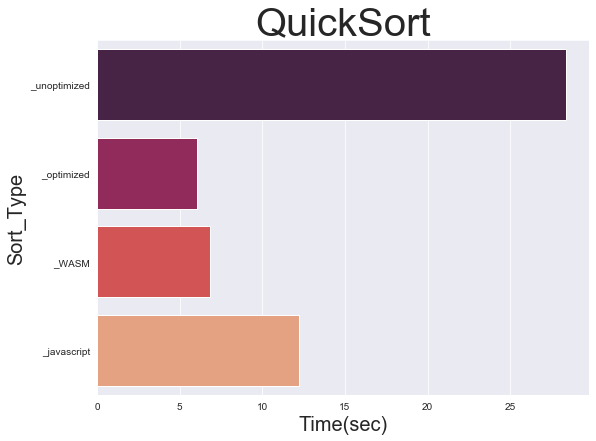

   _unoptimized  _optimized  _WASM  _javascript
0        28.379       6.047  6.833       12.242


In [9]:
quicksort_values=get_data("quicksort")
plot_graph("QuickSort",quicksort_values)

In [ ]:
selectionsort_values=get_data("selectionsort")
plot_graph("SelectionSort",selectionsort_values)

Calculating time for _unoptimized selectionsort


Calculating time for _unoptimized mergesort
31.536
Calculating time for _optimized mergesort
10.058
Calculating time for _WASM mergesort
7.473
Calculating time for _javascript mergesort
22.055
{'_unoptimized': 31.536, '_optimized': 10.058, '_WASM': 7.473, '_javascript': 22.055}


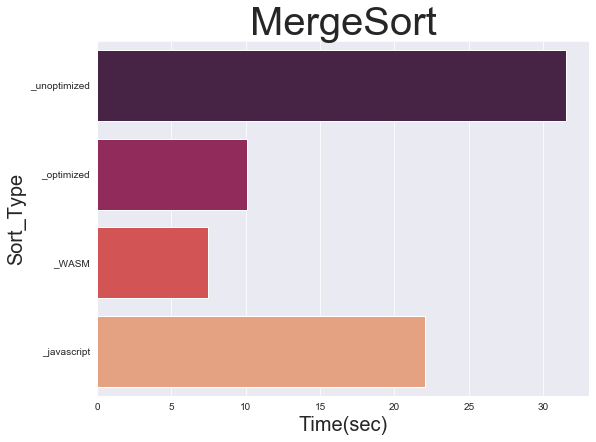

   _unoptimized  _optimized  _WASM  _javascript
0        31.536      10.058  7.473       22.055


In [12]:
mergesort_values=get_data("mergesort")
plot_graph("MergeSort",mergesort_values)

In [ ]:
heapsort_values=get_data("heapsort")
plot_graph("HeapSort",heapsort_values)